In [153]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

import utils
import importlib

import seaborn as sns
import scipy.signal

In [155]:
train, test, info, key, index = utils.ReadData("debug2", return_index=True)

In [157]:
data = train.values

In [158]:
data = np.nan_to_num(data, 0)

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


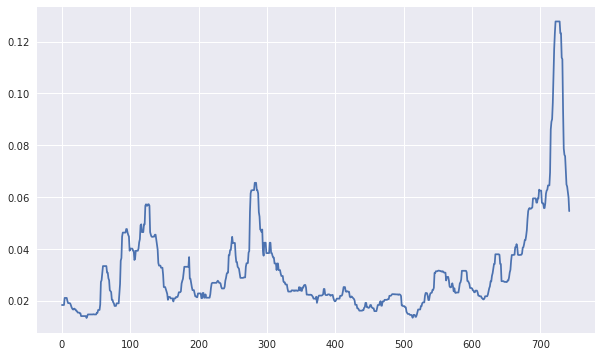

In [159]:
# plt.plot(data[2])
plt.plot(train_median[2])

In [160]:
train_median = scipy.signal.medfilt(data, (1, 15))

In [161]:
train_median.mean(axis=1)

array([1.39851952e+01, 1.72947510e+00, 1.28415882e+02, ...,
       1.13189771e+00, 8.70903096e+02, 2.33146972e+03])

In [162]:
train_median = train_median[train_median.mean(axis=1) > 2]

In [163]:
train_median = (train_median.T / np.linalg.norm(train_median, axis=1).T).T

In [164]:
from sklearn.cluster import KMeans

In [165]:
number_of_cluster = 10

In [112]:
kmeans = KMeans(n_clusters=number_of_cluster)
kmeans.fit(train_median)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


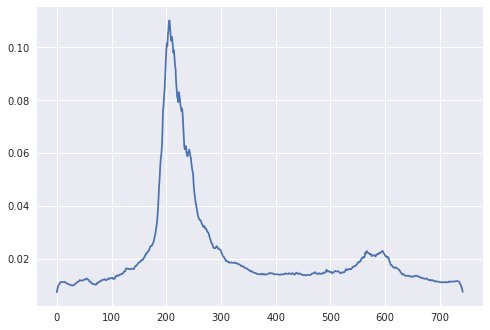

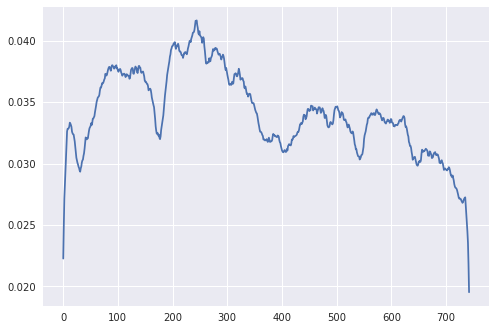

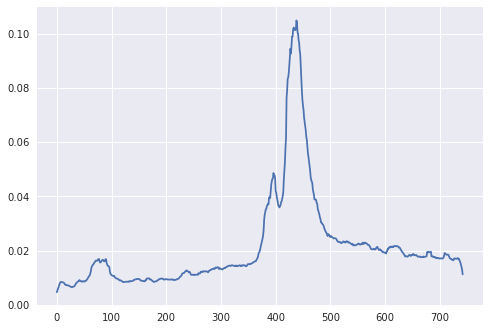

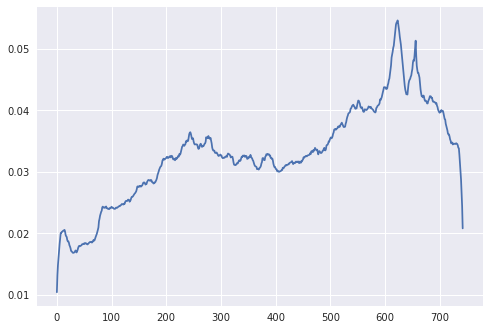

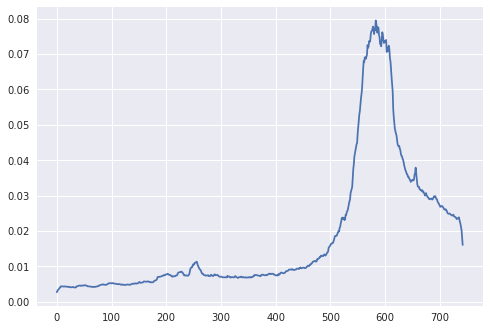

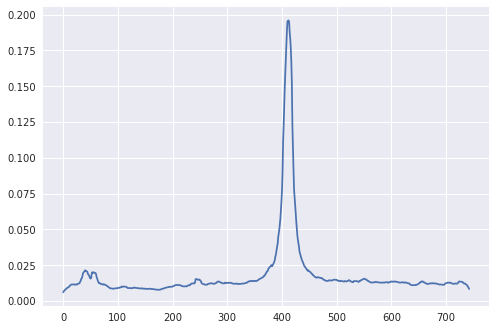

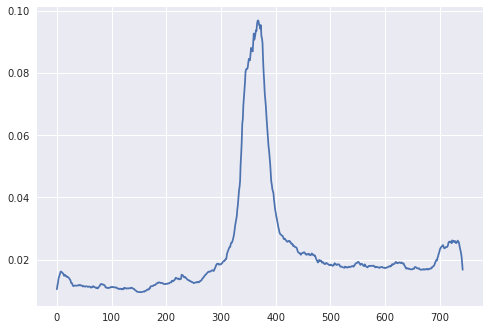

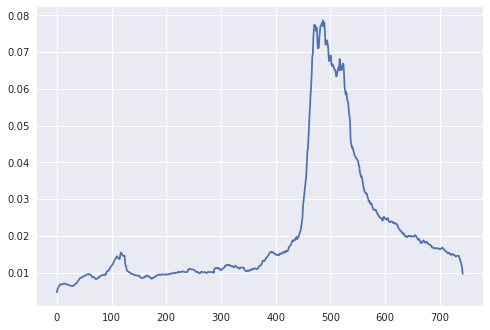

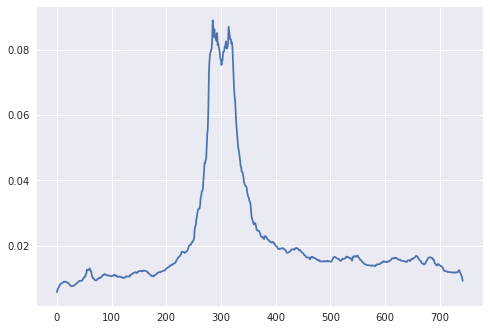

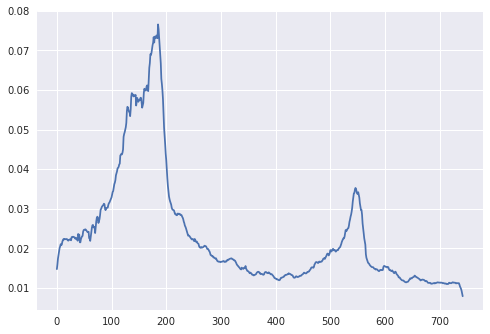

In [113]:
for i in range(number_of_cluster):
    plt.plot(kmeans.cluster_centers_[i])
    plt.show()

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


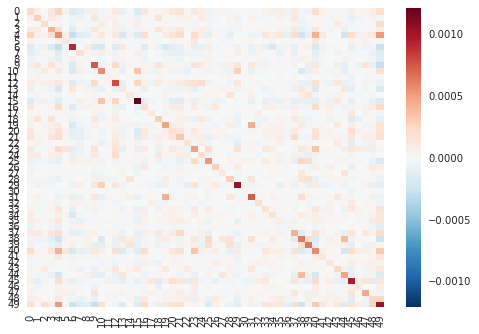

In [21]:
sns.heatmap(np.cov(train_median[:50]))

In [149]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.003, min_samples=2, metric='cosine').fit(train_median)
clustering.labels_


array([-1, -1, -1, ..., -1, -1, -1])

In [150]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
clustering.labels_ == i

/opt/conda/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


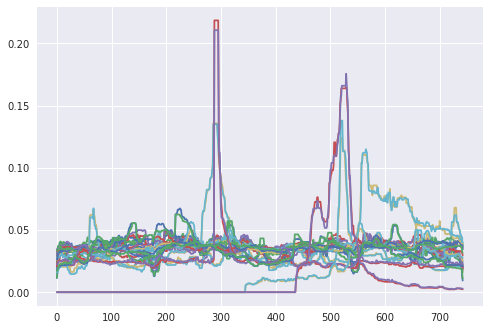

In [151]:
for i in range(20):
    try:
        for  j in range(3):
            plt.plot(np.log1p(train_median[clustering.labels_ == i][j]))
        
        plt.show()
    except:
        pass

In [143]:
(clustering.labels_ == 3).sum()

2

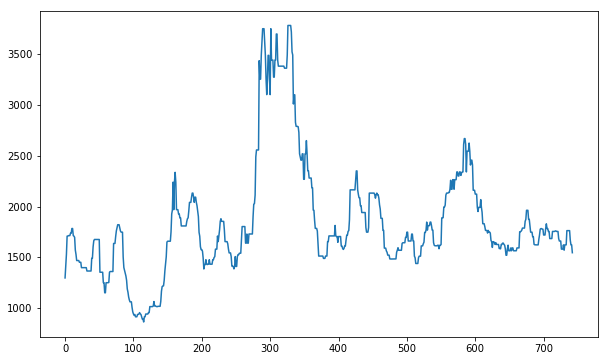

In [36]:
# plt.plot(train.values[0])
plt.plot(scipy.signal.medfilt(train.values[:10], (1, 15))[5])

In [14]:
np.roll(train.values[0], 5)

array([2.030e+02, 2.040e+02, 1.180e+02, 1.040e+02, 9.800e+01, 2.000e+00,
       1.000e+01, 8.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
       3.000e+00, 1.200e+01, 3.000e+00, 0.000e+00, 6.000e+00, 9.000e+00,
       7.000e+00, 2.400e+01, 3.000e+00, 4.000e+00, 1.200e+01, 3.000e+00,
       1.000e+00, 4.000e+00, 8.000e+00, 7.000e+00, 5.000e+00, 7.000e+00,
       7.000e+00, 1.000e+00, 7.000e+00, 6.000e+00, 4.000e+00, 3.000e+00,
       2.000e+00, 2.000e+00, 6.000e+00, 4.000e+00, 6.000e+00, 5.000e+00,
       5.000e+00, 6.000e+00, 7.000e+00, 7.000e+00, 1.100e+01, 3.000e+00,
       3.000e+00, 5.000e+00, 5.000e+00, 8.000e+00, 2.000e+00, 5.000e+00,
       4.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 3.000e+00, 5.000e+00,
       2.700e+01, 6.000e+00, 1.200e+01, 7.000e+00, 7.000e+00, 6.000e+00,
       9.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 5.000e+00, 7.000e+00,
       7.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 3.000e+01,
       8.000e+00, 9.000e+00, 7.000e+00, 8.000e+00, 

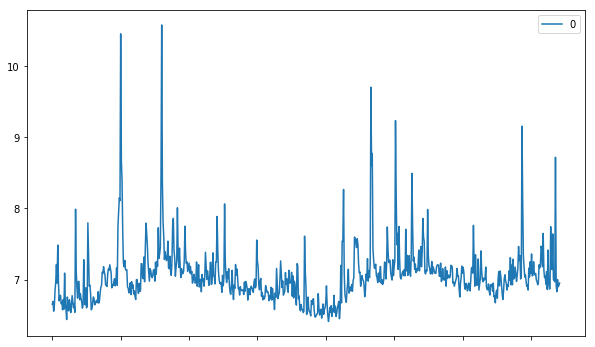

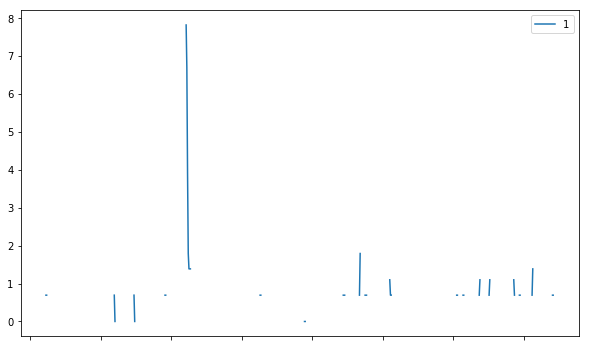

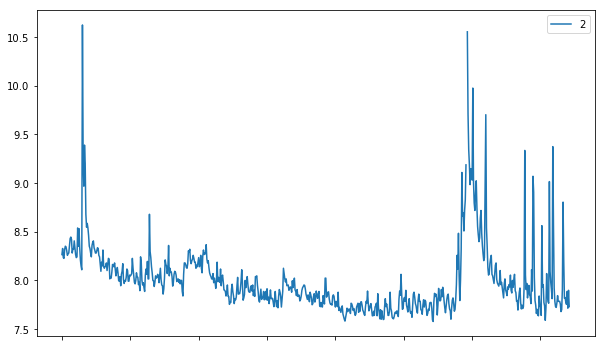

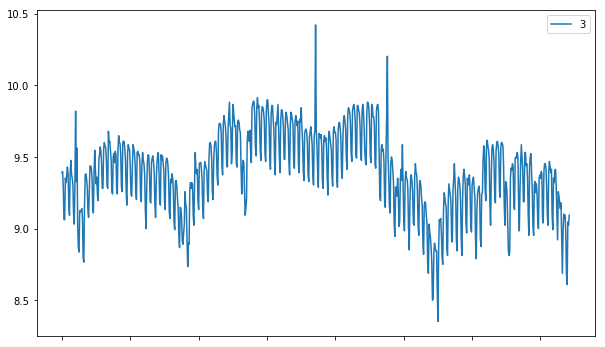

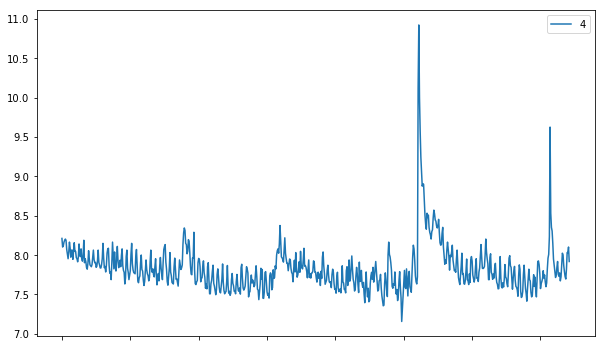

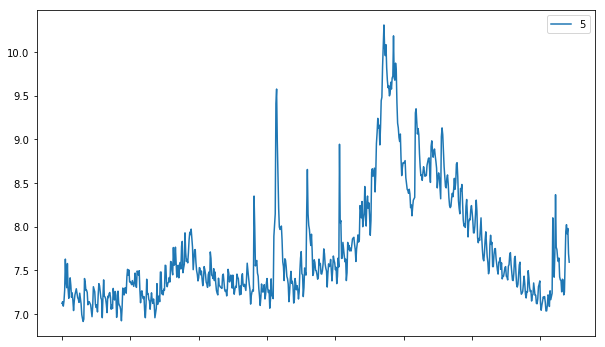

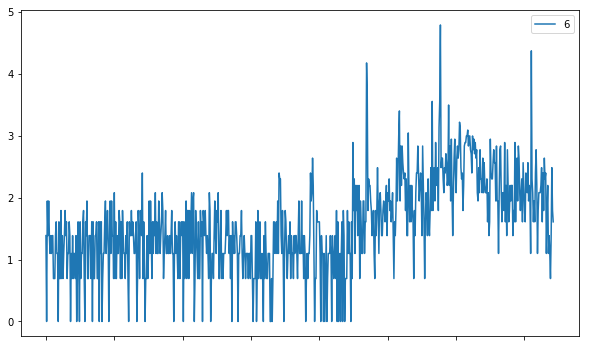

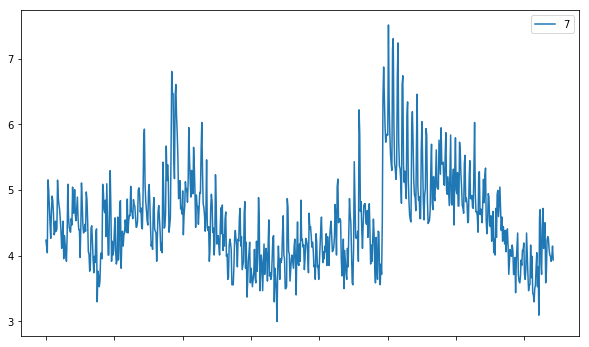

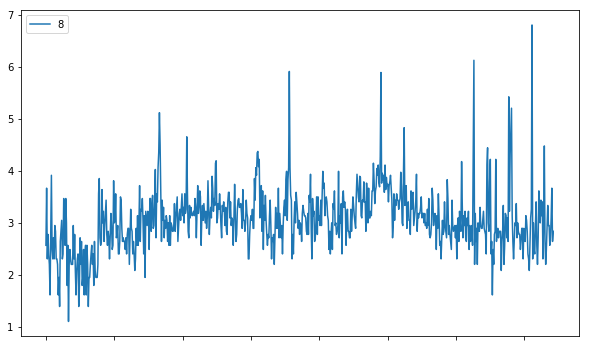

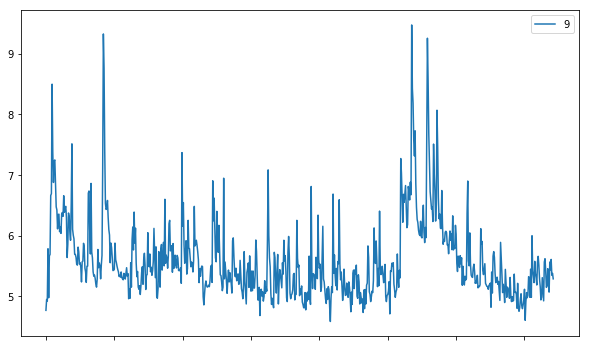

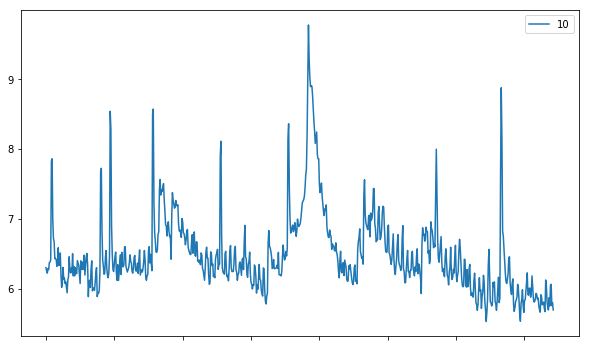

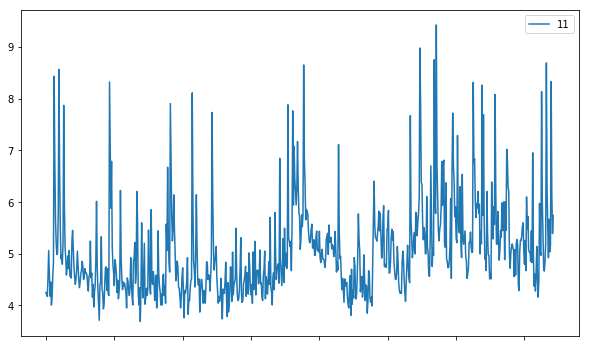

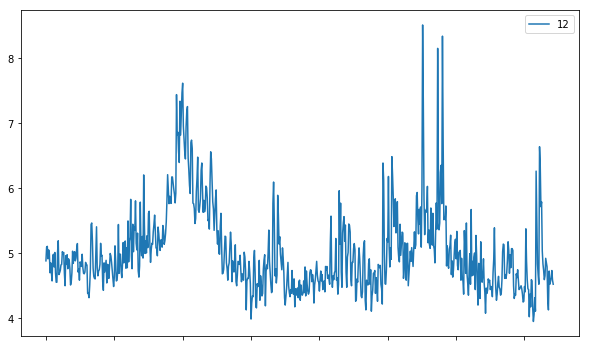

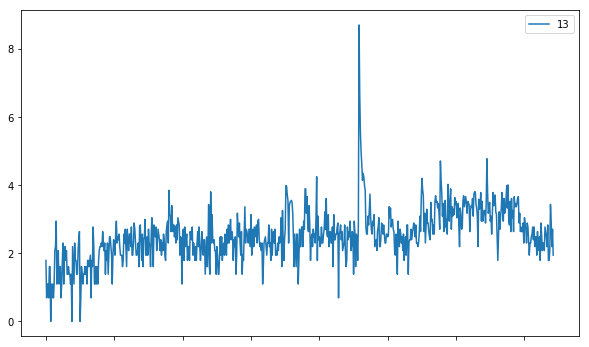

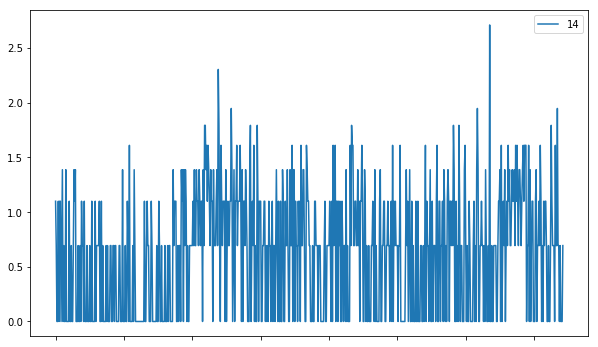

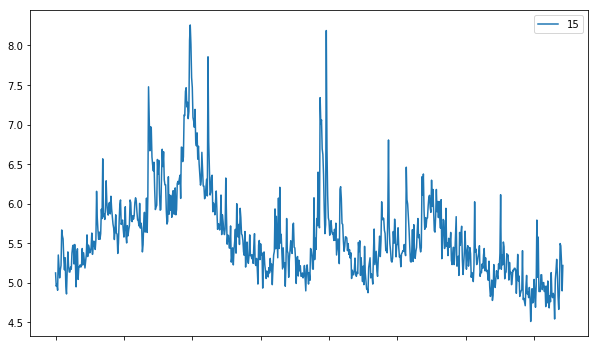

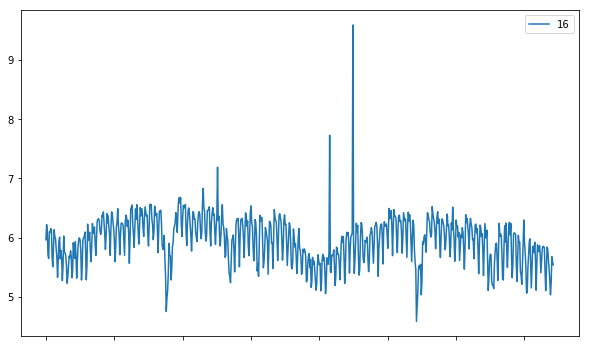

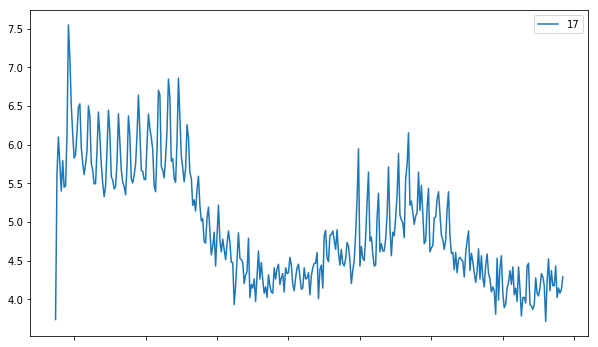

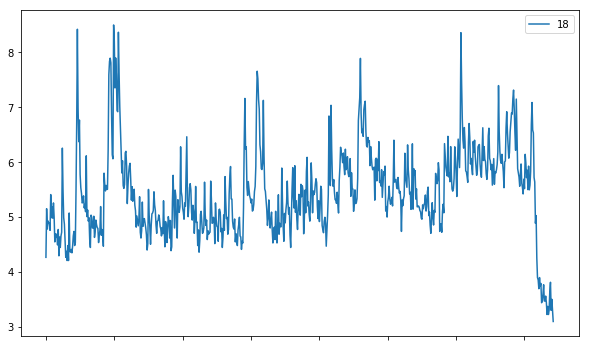

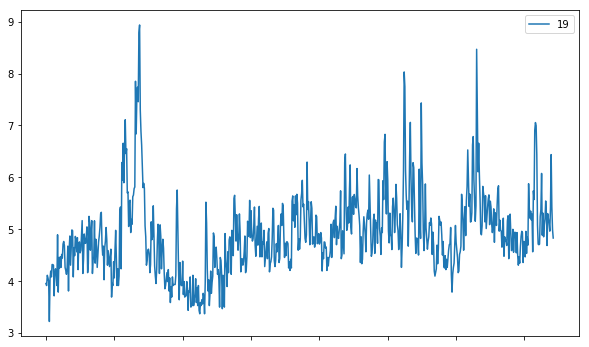

In [13]:
for i in range(20):
    np.log1p(train[i:i+1].T).plot.line()

In [12]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,2017-07-11,2017-07-12
0,773.0,805.0,702.0,758.0,944.0,1053.0,1355.0,1042.0,1782.0,1052.0,...,1097.0,1080.0,1060.0,6120.0,1012.0,924.0,1096.0,990.0,1008.0,1040.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,3884.0,4140.0,3768.0,3742.0,4104.0,4232.0,4204.0,4028.0,3864.0,3912.0,...,6656.0,3656.0,2480.0,2496.0,2386.0,2332.0,2658.0,2240.0,2692.0,2274.0
3,11952.0,12096.0,10744.0,8640.0,8600.0,11528.0,11168.0,11776.0,12496.0,11888.0,...,8000.0,8936.0,8696.0,8904.0,7856.0,5896.0,5480.0,8488.0,8320.0,8864.0
4,3690.0,3308.0,3348.0,3500.0,3598.0,3660.0,3608.0,3204.0,3028.0,2844.0,...,2976.0,2606.0,2410.0,2268.0,2196.0,2496.0,3066.0,3078.0,3298.0,2744.0
